In this notebook, I am going to analyze a dataset which contains all the dialogues (including deleted ones) from 'The Office', one of my favorite shows. I found this dataset on Reddit and thought would be a fun way to explore the world of text analytics and NLTK in python. 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk

In [3]:
# Importing the dataset
office = pd.read_csv('the-office-lines-scripts.csv')

Let's see what columns we have in the dataset

In [4]:
office.columns

Index(['id', 'season', 'episode', 'scene', 'line_text', 'speaker', 'deleted'], dtype='object')

There are a total of 59909 dialogues.

In [5]:
office.shape

(59909, 7)

In [6]:
office.head()

id  season  episode  scene  \
0   1       1        1      1   
1   2       1        1      1   
2   3       1        1      1   
3   4       1        1      1   
4   5       1        1      1   

                                           line_text  speaker deleted  
0  All right Jim. Your quarterlies look very good...  Michael   False  
1         Oh, I told you. I couldn't close it. So...      Jim   False  
2  So you've come to the master for guidance? Is ...  Michael   False  
3         Actually, you called me in here, but yeah.      Jim   False  
4    All right. Well, let me show you how it's done.  Michael   False

Let's see how many different speakers we had on the show. Some of the dialogues were spoken by multiple characters together. So this is not the number of the total number of characters in the show.

In [7]:
office['speaker'].nunique()

797

Top 10 characters with the most dialogues.

In [8]:
office['speaker'].value_counts().head(10)

Michael    12137
Dwight      7529
Jim         6814
Pam         5375
Andy        3968
Kevin       1708
Angela      1695
Oscar       1490
Erin        1469
Ryan        1379
Name: speaker, dtype: int64

Unsurprisingly, Michael has the most dialogues in spite of leaving the show in the 7th season. 

Before moving onto working with the text, we will convert everything to lower case to make things simpler.

In [7]:
office['line_text'] = office['line_text'].str.lower()

In [8]:
office.head()

id  season  episode  scene  \
0   1       1        1      1   
1   2       1        1      1   
2   3       1        1      1   
3   4       1        1      1   
4   5       1        1      1   

                                           line_text  speaker deleted  
0  all right jim. your quarterlies look very good...  Michael   False  
1         oh, i told you. i couldn't close it. so...      Jim   False  
2  so you've come to the master for guidance? is ...  Michael   False  
3         actually, you called me in here, but yeah.      Jim   False  
4    all right. well, let me show you how it's done.  Michael   False

Some of the funniest moments in the show are when Michael comes up with his 'That's what she said' punchline. Let's see how many times he said it throughout the show.

In [11]:
sum(office[office['speaker']=='Michael']['line_text'].str.contains("that's what she said"))

24

Let's calculate the frequency of all words, including punctuations in the text. First, we will create a string which contains all the dialogues and tokenize the text. <br>
Before doing any of that, we will remove all the punctuation.

In [9]:
# Importing tokenizer
from nltk.tokenize import RegexpTokenizer

In [10]:
# Importin stopwords
from nltk.corpus import stopwords

In [11]:
# Importing modules for building wordclouds
from PIL import Image
from wordcloud import WordCloud

In [12]:
all_lines = ' '.join(office['line_text'])

In [13]:
regexptokenizer = RegexpTokenizer(r'\w+')

In [14]:
all_lines = regexptokenizer.tokenize(all_lines)

In [15]:
distribution = nltk.FreqDist(all_lines)

20 most common words

In [16]:
distribution.most_common(20)

[('i', 29716),
 ('you', 24564),
 ('the', 17716),
 ('to', 16633),
 ('a', 15257),
 ('s', 14551),
 ('it', 13854),
 ('that', 11282),
 ('and', 11155),
 ('is', 8434),
 ('t', 7982),
 ('of', 7540),
 ('in', 6876),
 ('what', 6588),
 ('no', 6028),
 ('we', 6015),
 ('this', 5882),
 ('on', 5190),
 ('my', 5025),
 ('me', 5009)]

### Lexical Diversity
Lexical diversity is  the ratio of the number of unique words in the text and the total words in the text. The reciprocal of this ratio gives us the average number of times each word was used.

In [80]:
lexical_diversity = len(set(all_lines))/len(all_lines)
print(lexical_diversity)

0.029242229384130326


Now let's make wordclouds of some of the characters and see what words they speak the most.<br>
Let's create a function that will do this for us.

In [156]:
def wordcloud(character):
    # This function will create a wordcloud for the character and show the most commonly spoken words by him/her.
    
    # We will find make a set of stopwords which we will remove from the dialogues.
    stop_words = set(stopwords.words('english'))
    
    # Extract the dialogues spoken by the character and tokenize them
    words = office[office['speaker'] == character]['line_text']
    words = ' '.join(words)
    words = regexptokenizer.tokenize(words)
    words = [word for word in words if word not in stop_words]
    words = ' '.join(words)
    
    # Create our wordcloud
    wc = WordCloud(background_color='white', max_words = 100)
    wc.generate(words)
    
    #Display the wordcloud
    plt.figure(figsize=(30,30))
    plt.imshow(wc,interpolation='bilinear', cmap = 'Set1')
    plt.axis('off')
    plt.show()

## Wordclouds

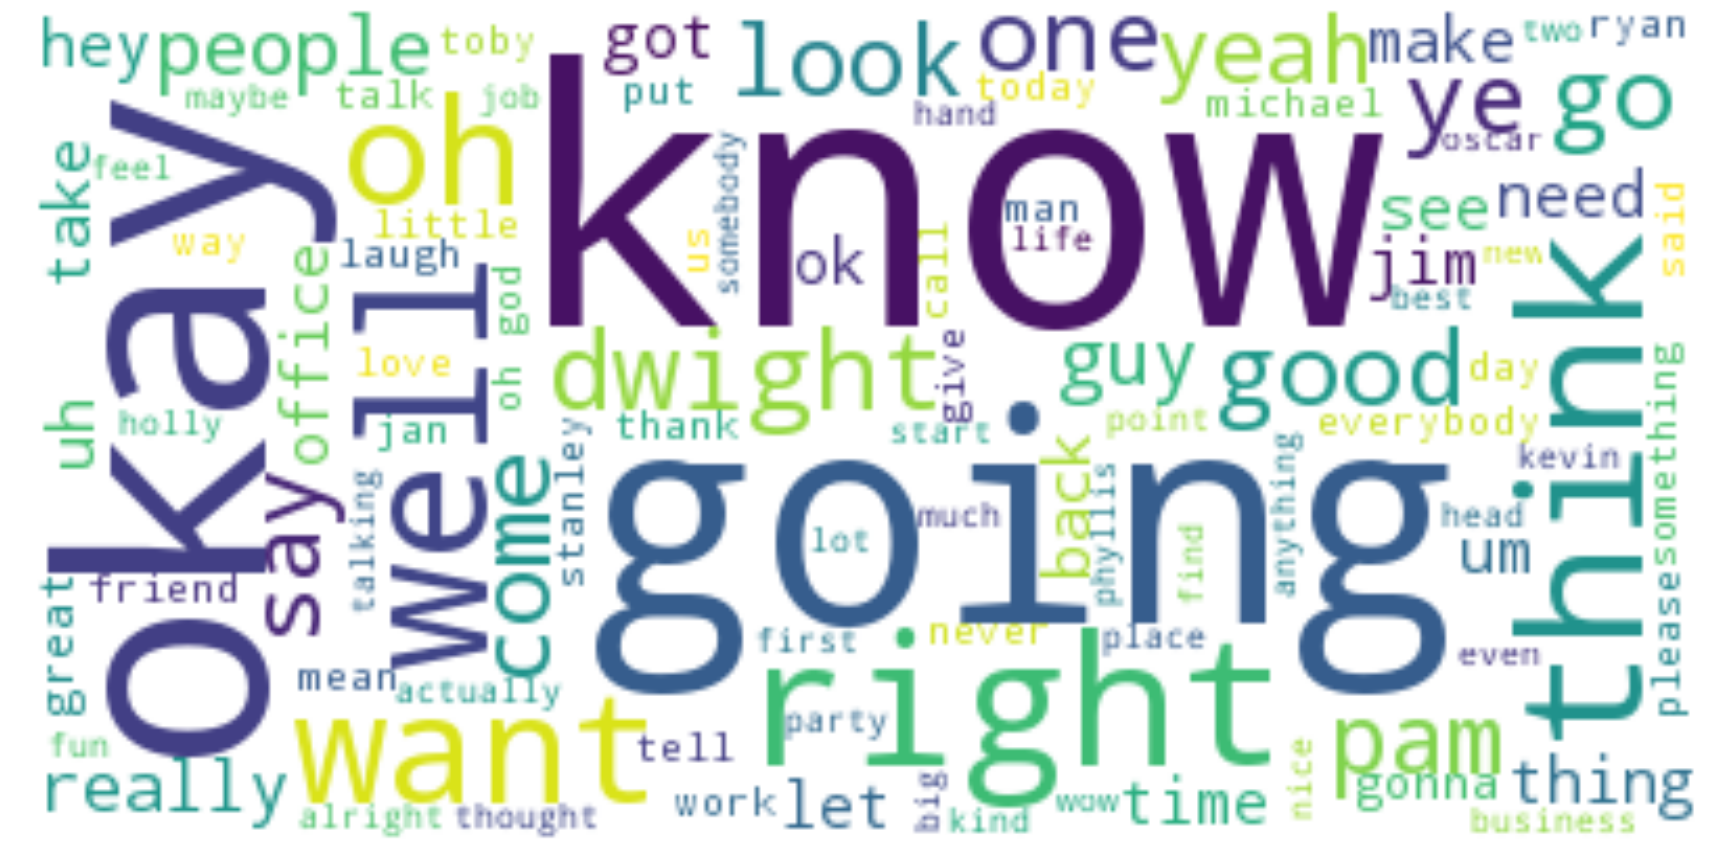

In [157]:
wordcloud('Michael')

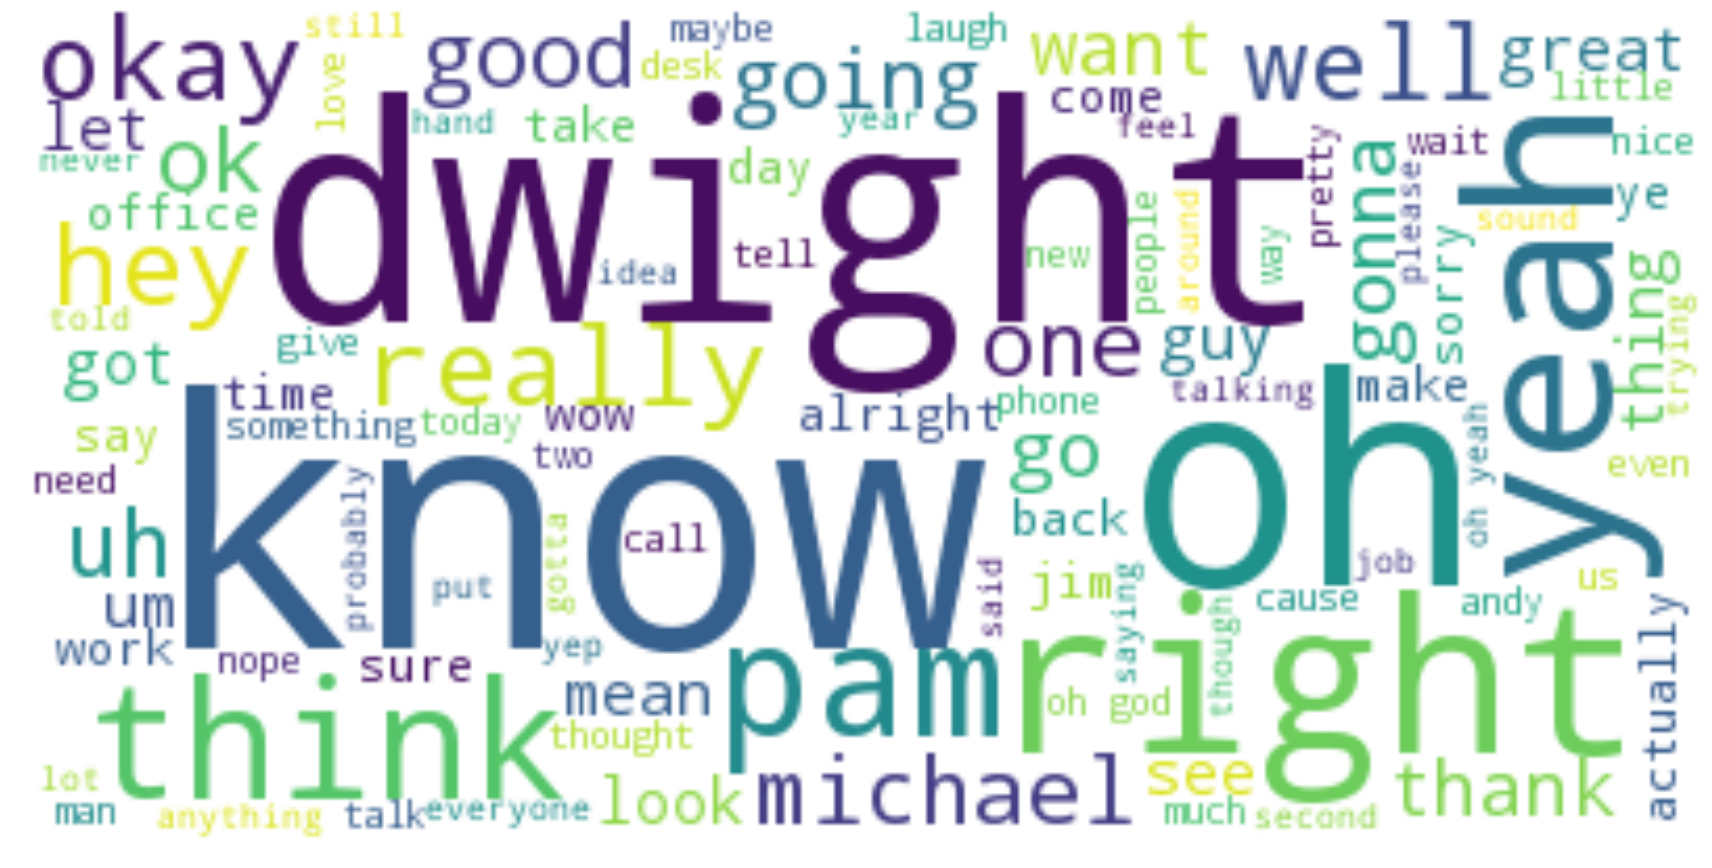

In [158]:
wordcloud('Jim')

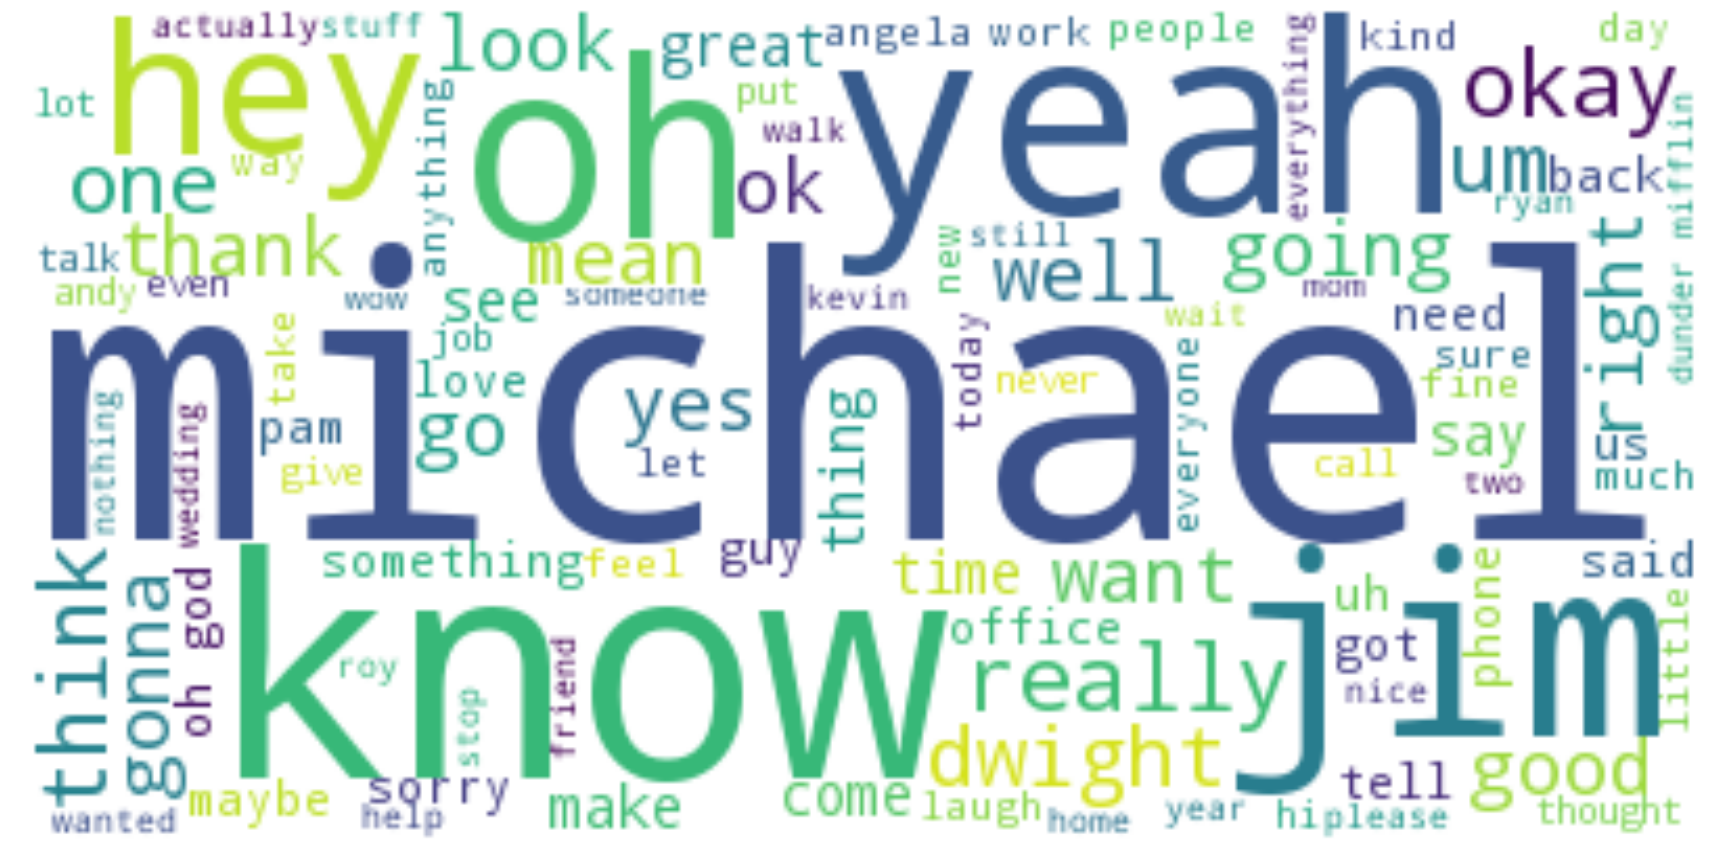

In [159]:
wordcloud('Pam')

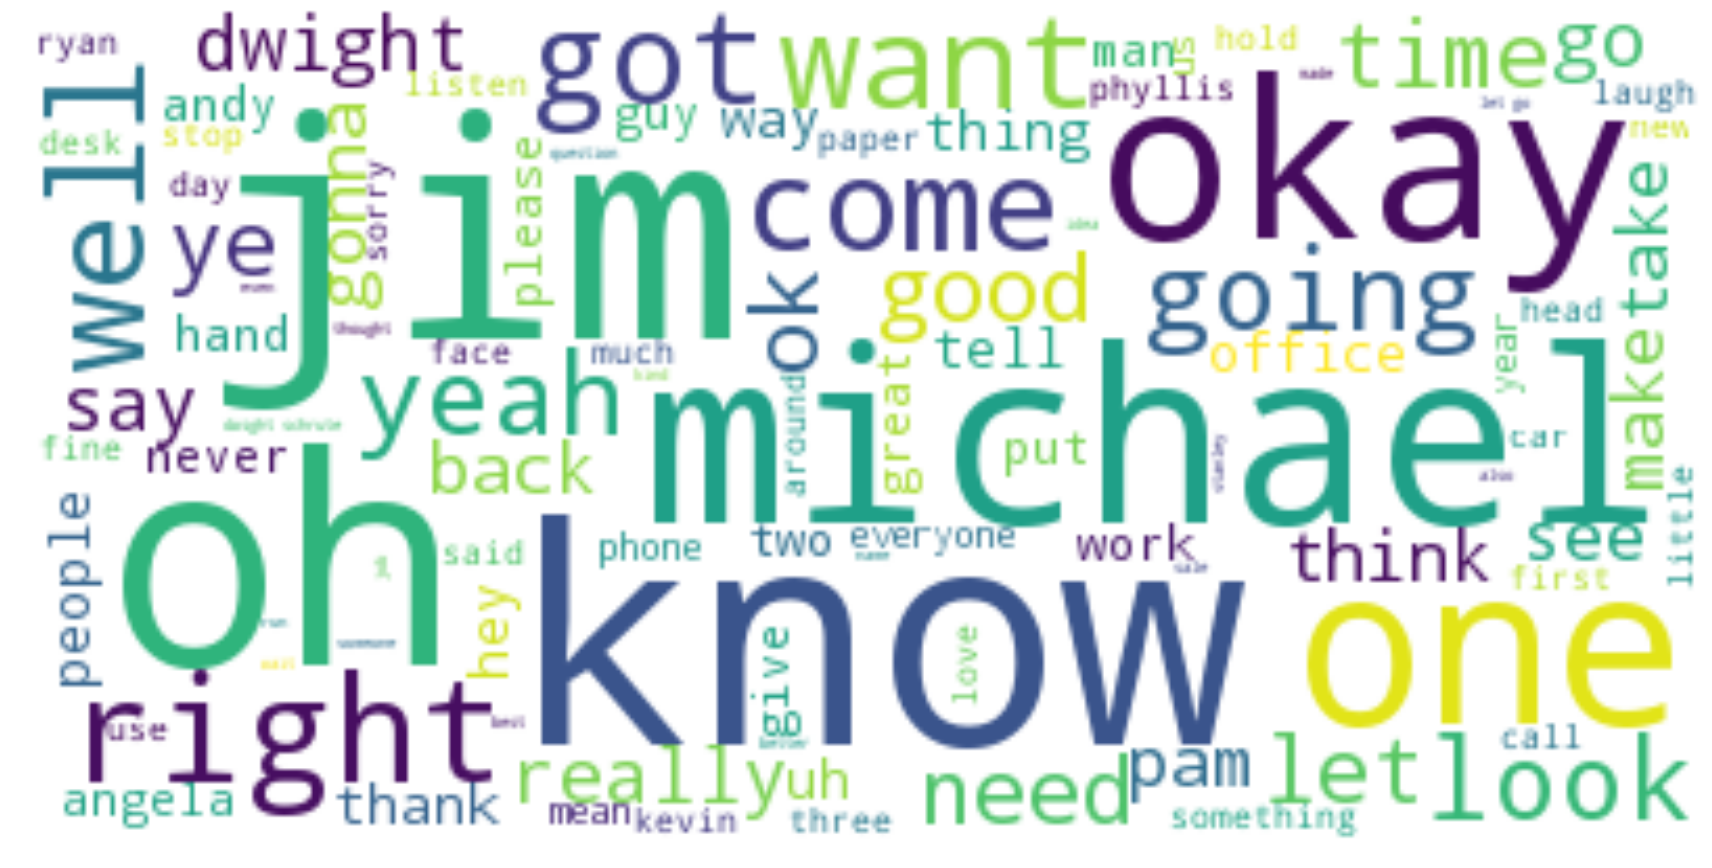

In [160]:
wordcloud('Dwight')

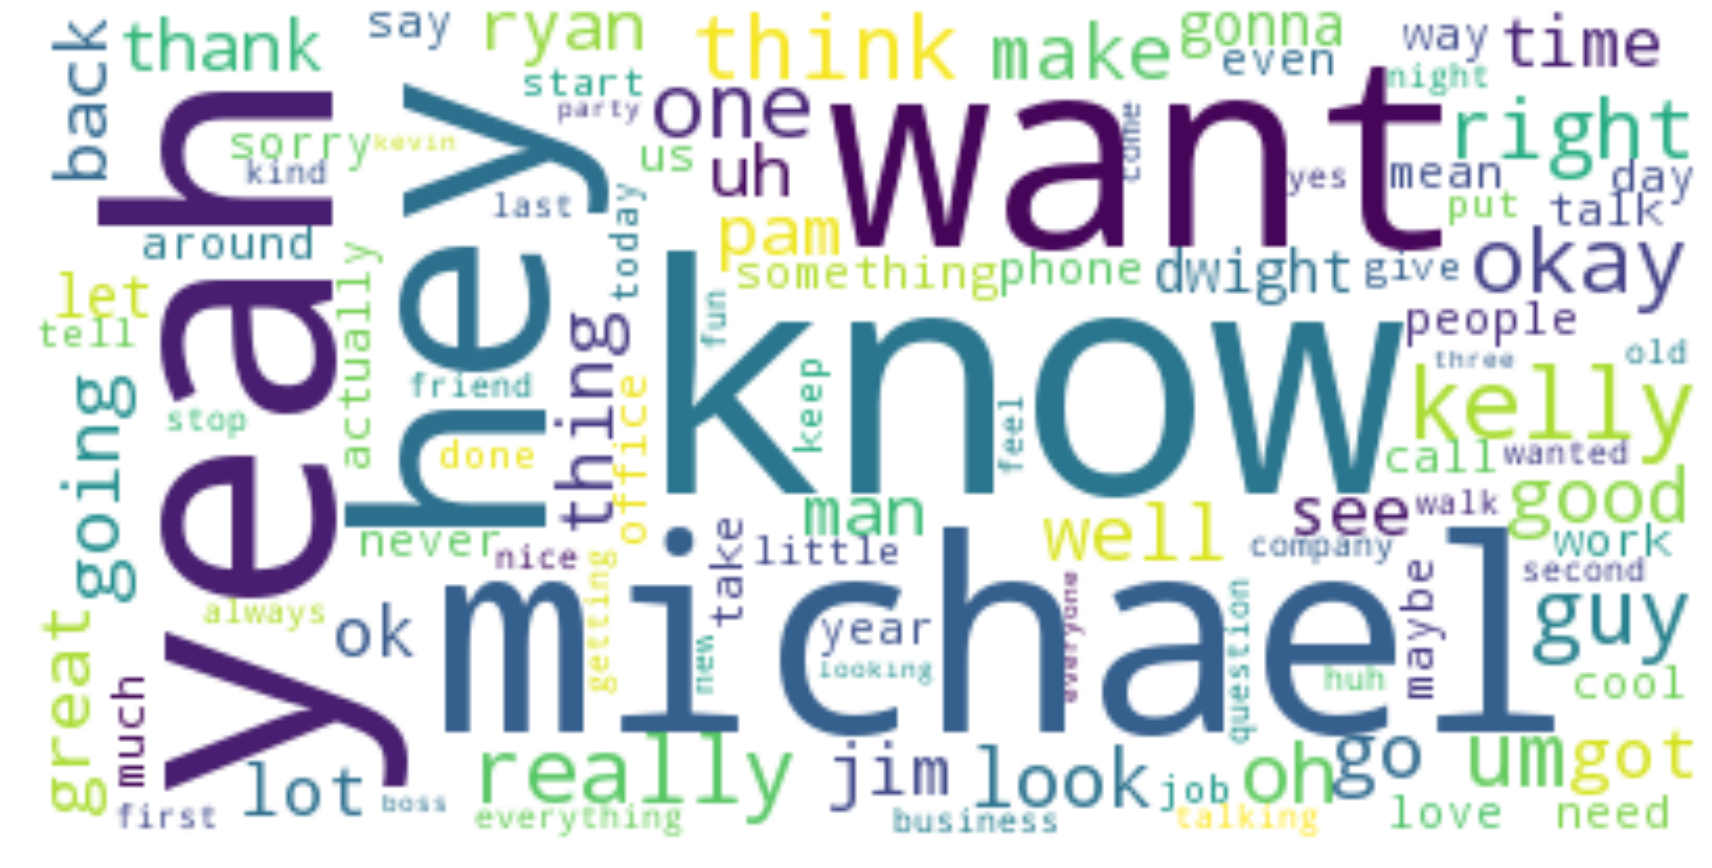

In [161]:
wordcloud('Ryan')

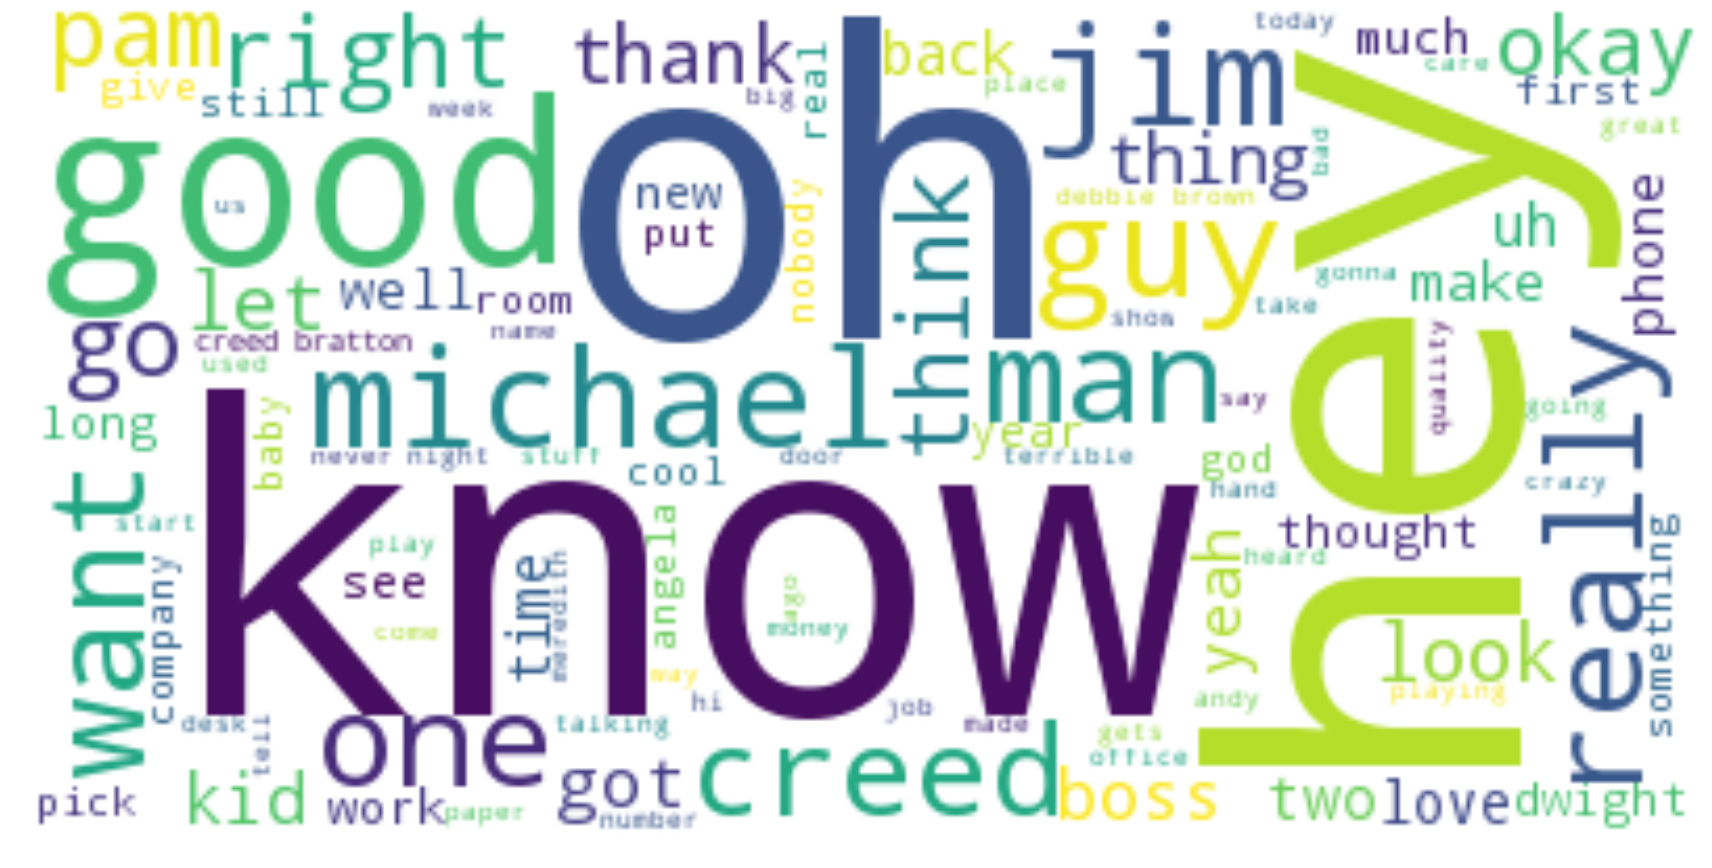

In [162]:
wordcloud('Creed')

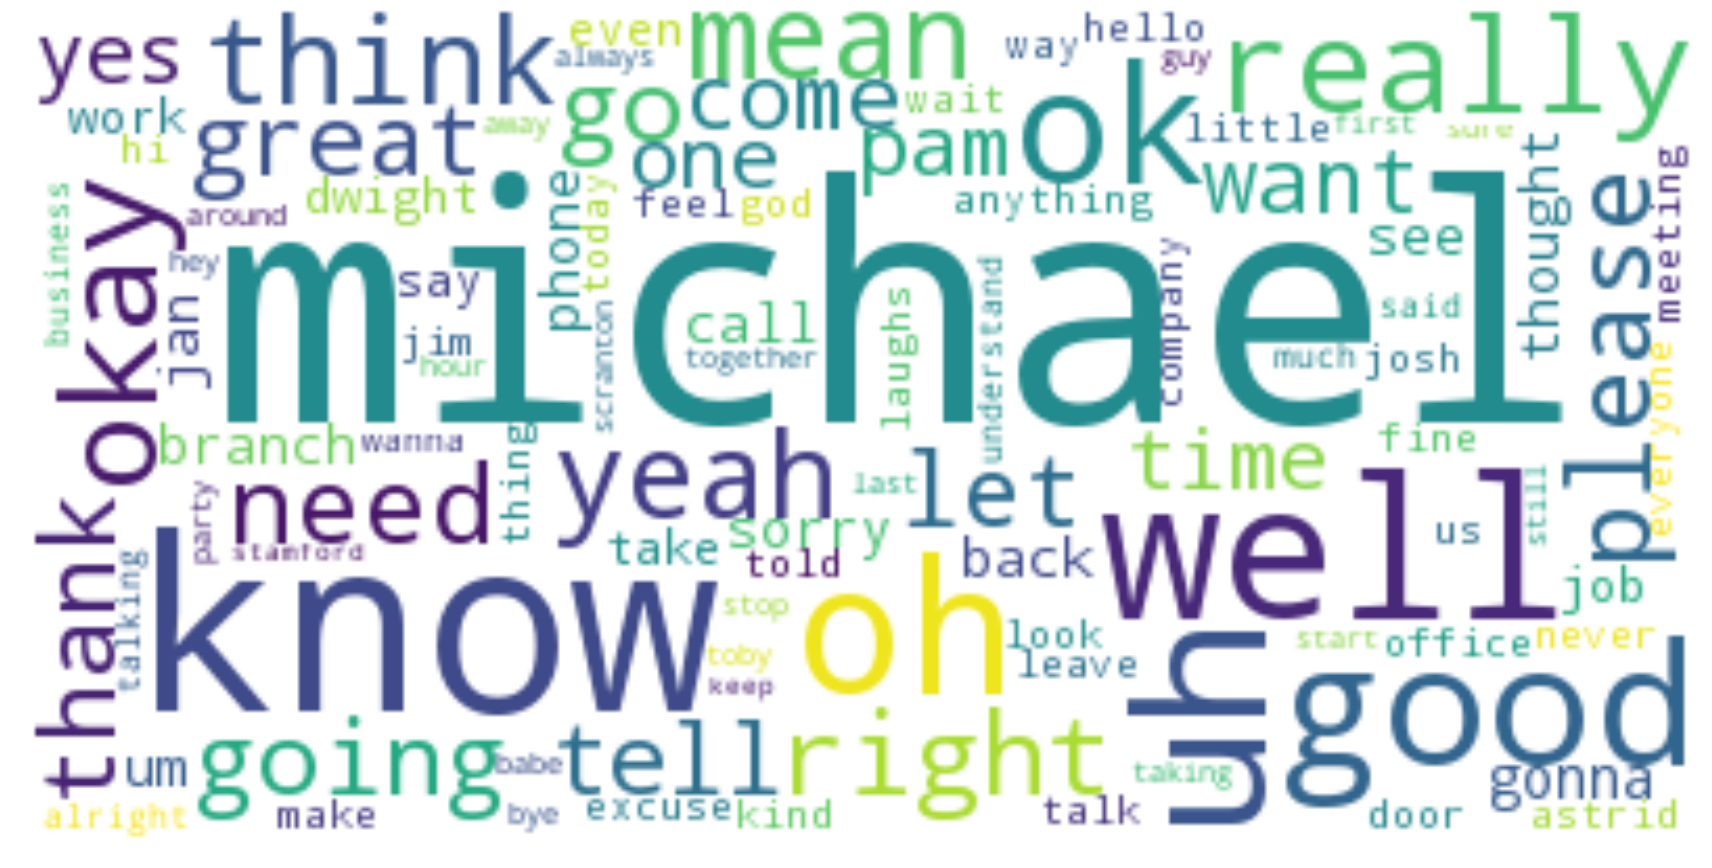

In [163]:
wordcloud('Jan')

Let's extract the text from the 4 main characters on the show - Michael, Jim, Pam, and Dwight.

In [17]:
michael = ' '.join(office[office['speaker'] == 'Michael']['line_text'])
jim = ' '.join(office[office['speaker'] == 'Jim']['line_text'])
pam = ' '.join(office[office['speaker'] == 'Pam']['line_text'])
dwight = ' '.join(office[office['speaker'] == 'Dwight']['line_text'])

In [18]:
michael = regexptokenizer.tokenize(michael)
jim = regexptokenizer.tokenize(jim)
pam = regexptokenizer.tokenize(pam)
dwight = regexptokenizer.tokenize(dwight)

We will create a dictionary of the form {character : [ tokenized dialogues spoken by the character]}

In [55]:
d = {}
d['michael'] = michael
d['jim'] = jim
d['pam'] = pam
d['dwight'] = dwight

In [19]:
qwords = ['why', 'what', 'when', 'where', 'who', 'how']

In [23]:
characters = ['michael', 'jim', 'pam', 'dwight']

In [59]:
d.keys()

dict_keys(['michael', 'jim', 'pam', 'dwight'])

In [123]:
cfd = nltk.ConditionalFreqDist((i, target)
                                 for i in d.keys()
                                 for w in d[i]
                                 for target in qwords
                                 if target == w
                                )

In [124]:
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'dwight': FreqDist({'how': 229,
                               'what': 827,
                               'when': 158,
                               'where': 110,
                               'who': 207,
                               'why': 150}),
                     'jim': FreqDist({'how': 240,
                               'what': 763,
                               'when': 95,
                               'where': 57,
                               'who': 150,
                               'why': 130}),
                     'michael': FreqDist({'how': 509,
                               'what': 1879,
                               'when': 302,
                               'where': 240,
                               'who': 449,
                               'why': 376}),
                     'pam': FreqDist({'how': 147,
                               'what': 459,
                               'when': 1

This is a bit difficult to read. Let's put this information in a nice table.

In [125]:
cfd.tabulate(condition = d.keys,samples = qwords)

          why  what  when where   who   how 
 dwight   150   827   158   110   207   229 
    jim   130   763    95    57   150   240 
michael   376  1879   302   240   449   509 
    pam    89   459   111    60    89   147 


We will try to see the usage of some words throughout every season of the show and see how it has changed.

For this, we need to create a separate list of tokens for each season. To make things simpler, we will write a function that does this for us.

In [84]:
def season_tokenize(season):
    text = office[office['season'] == season]['line_text']
    text = ' '.join(text)
    text = regexptokenizer.tokenize(text)
    return text

In [85]:
s1 = season_tokenize(1)
s2 = season_tokenize(2)
s3 = season_tokenize(3)
s4 = season_tokenize(4)
s5 = season_tokenize(5)
s6 = season_tokenize(6)
s7 = season_tokenize(7)
s8 = season_tokenize(8)
s9 = season_tokenize(9)

Again, we will create a dictionary and select a few words whose frequency we want to know.

In [86]:
some_words = ['paper', 'dundie', 'office', 'scranton', 'conference']

In [117]:
s = {}
s['1'] = s1
s['2'] = s2
s['3'] = s3
s['4'] = s4
s['5'] = s5
s['6'] = s6
s['7'] = s7
s['8'] = s8
s['9'] = s9

In [133]:
cfd2 = nltk.ConditionalFreqDist((target, i)
                                 for i in s.keys()
                                 for w in s[i]
                                 for target in some_words
                                 if w.startswith(target)
                                )

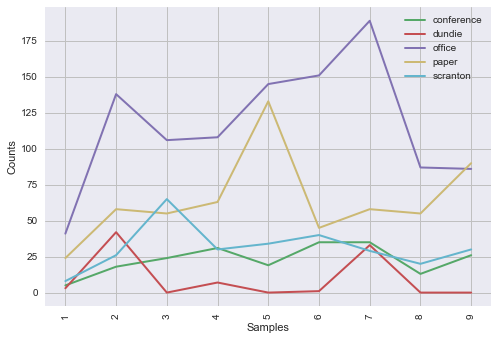

In [143]:
cfd2.plot()

1. This plot shows us that the word 'dundie' was used the most in the second season (when the awards were shown on the show) and the seventh season(again when the cast hosted the dundies before Michael left the branch). <br>
2. The use of the word 'office' kept on rising until the seventh season after which it fell over 50% of its higest frequency for the last two seasons.<br>
3. 'Paper', 'conference', and 'scranton' had a steady usage throughout the length of the show except in the second season when 'scranton' was used more and in the fifth season when 'office' was used over 125 times.

### Bigrams and Collocations

Bigrams are just word pairs. For example, in the sentence 'This notebook is awesome.', we have 3 bigrams - (This, notebook), (notebook, is), and (is, awesome). Collocations are bigrams which appear with a very high frequency. In the Office, we expect 'Dunder Mifflin' to be a collocation.

What other collocations could be present in our data? Let's find out!

NLTK provides a collcations function. However, to use it we must convert our text to nltk.Text 

In [159]:
nltk.Text(all_lines).collocations()

dunder mifflin; conference room; michael scott; new york; little bit;
hey hey; regional manager; whoa whoa; david wallace; clears throat;
parking lot; cell phone; blah blah; phone rings; dwight schrute; ice
cream; feel like; last night; good luck; walks away


I would like to point out that some of these pairs such as (clears throat), (walks away), (phone rings) are not actual words spoken by any of the actors. These are actions they performed before or after speaking something and are included in the dialogues just to provide some context. Such words usually appear inside square brackets as you might have noticed in subtitles.